<a href="https://colab.research.google.com/gist/Bartolomeo0609/53ba317baf927b16d6603961cf43b8f3/clustering-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Data

In [ ]:
# Dependencies
! pip install -U -q PyDrive seaborn cython
! pip install git+https://github.com/scikit-learn/scikit-learn

  Cloning https://github.com/scikit-learn/scikit-learn to /tmp/pip-req-build-7l5q7vvn
  Running setup.py bdist_wheel for scikit-learn ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /tmp/pip-ephem-wheel-cache-m7cxr8w9/wheels/f4/41/37/c2600ad831f7b66477b4a91f31feb311e9a841754198a9d60b
Successfully built scikit-learn


In [ ]:
# Download data

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # download data
# drive.CreateFile({'id': '1fPSHoAr6kagUvaaBgyvW3GGNAX6AjyQk'}).GetContentFile('moons.csv')

## Imports

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans

sns.set_style("darkgrid")

METHODS = ["single", "complete", "average", "ward", "kmeans"]

In [ ]:
def cluster(positions, n_clusters = 2):

  sns.scatterplot(
      x = positions[:, 0],
      y = positions[:, 1],
  )

  plt.show()


  # GET CLUSTERS

  f = plt.figure()
  f.set_size_inches(25, 6)



  for i, method in enumerate(METHODS):

    if method != "kmeans":
      model = AgglomerativeClustering(
        n_clusters = n_clusters,
        linkage = method
      )
    else:
      model = KMeans(
        n_clusters = n_clusters
      )

    labels = model.fit_predict(positions)


    plt.subplot(1,len(METHODS),i+1)
    plt.title(method)

    for c in range(n_clusters):
      sns.scatterplot(
          x = positions[labels == c][:, 0],
          y = positions[labels == c][:, 1],
      )


  plt.show()

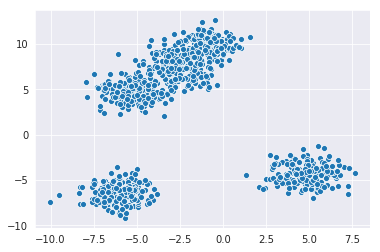

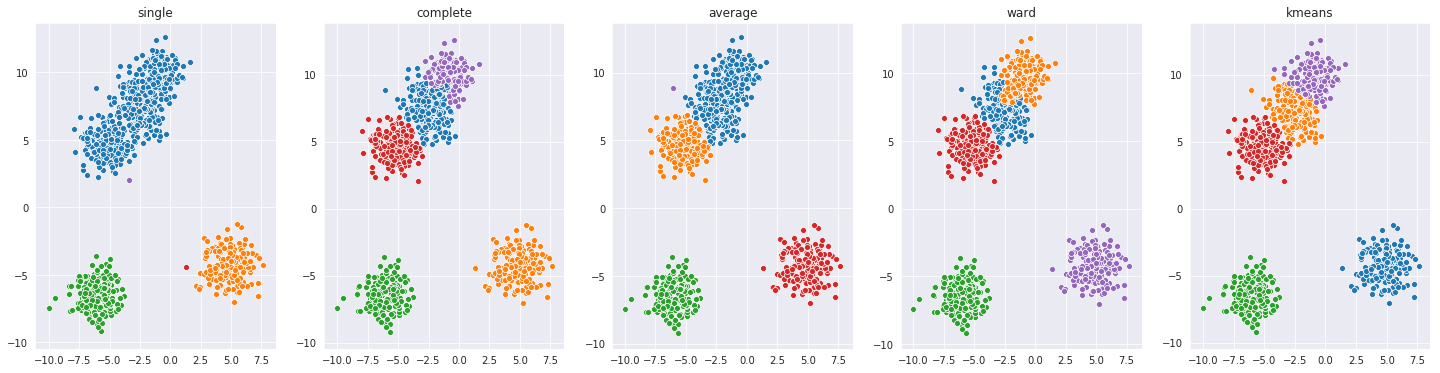

In [ ]:
n_clusters = 5

# LOAD DATA
positions, _1 = datasets.make_blobs(1000, centers= n_clusters)
cluster(positions, n_clusters = n_clusters)

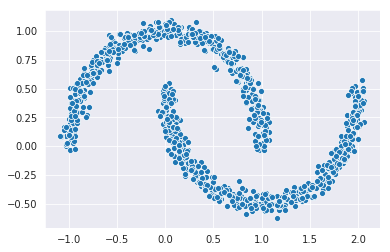

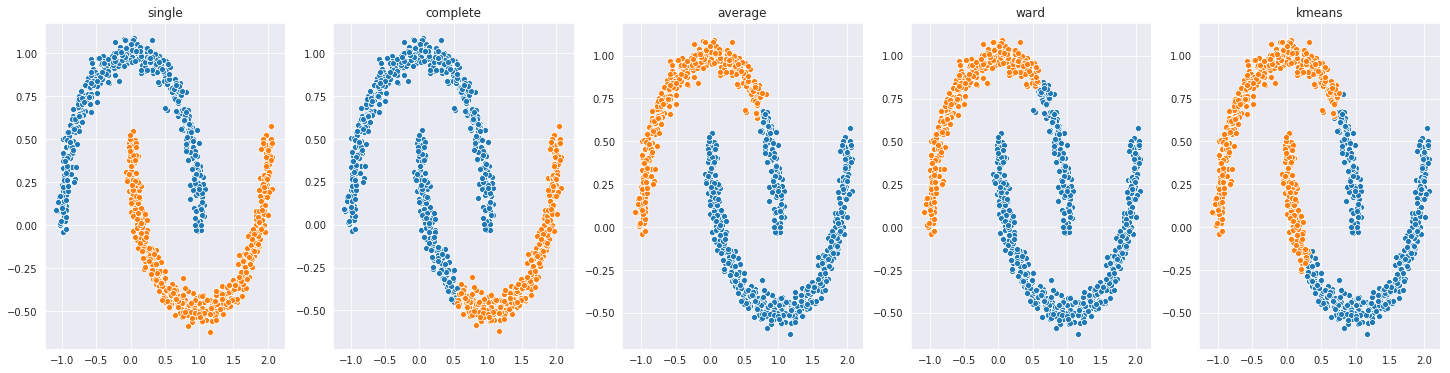

In [ ]:
# LOAD DATA
positions, _1 = datasets.make_moons(1000, noise=0.05)
cluster(positions, n_clusters = 2)



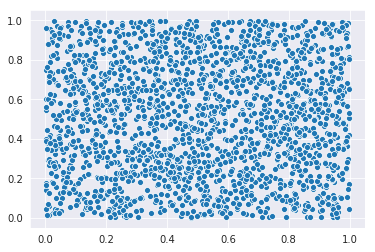

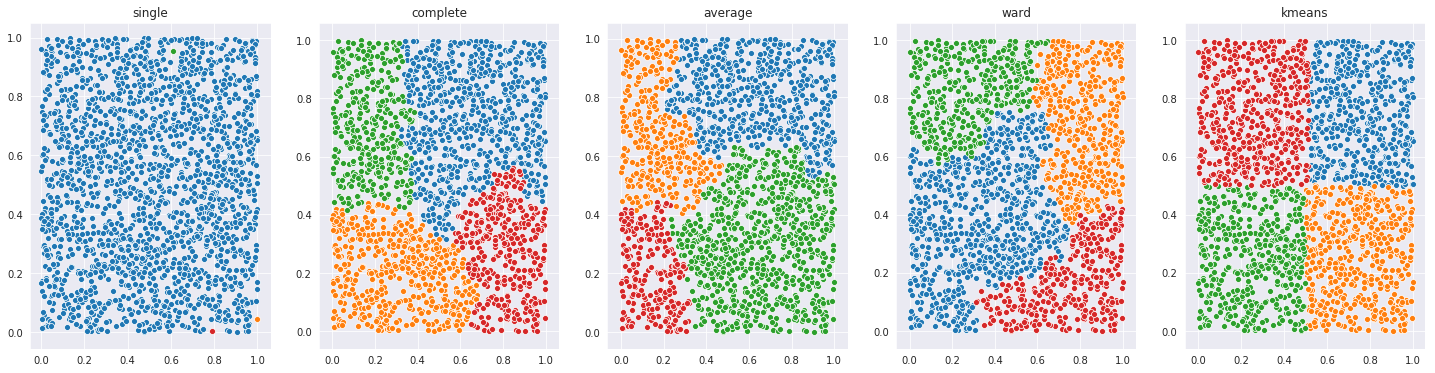

In [ ]:
# LOAD DATA
positions = np.random.uniform(size = (2000, 2))


cluster(positions, n_clusters = 4)